In [7]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Karar ağacı regresyon modeli ve görselleştirme fonksiyonu
from sklearn.model_selection import train_test_split  # Eğitim/test verisi bölme
import matplotlib.pyplot as plt  # Görselleştirme için
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score #gerekli metrikler


In [9]:
# Excel dosyasını oku
# Veri seti Excel dosyasından read_excel() fonksiyonu ile yüklenmiştir.
# Bu dosya içinde enflasyon tahmini için kullanılacak ekonomik veriler yer almaktadır.
df = pd.read_excel("/Users/miray/Desktop/miraydataset.xlsx")

In [11]:
# Özellikler (X) ve hedef değişken (y) tanımla
X = df.drop(columns=["enflasyon", "country"])  # Sayısal özellikler
y = df["enflasyon"]  # Tahmin etmek istediğimiz değişken

# Veri setini DataFrame formatında inceleme
df_X = pd.DataFrame(X, columns=X.columns)
# X verisindeki sütunları kullanarak yeni bir pandas DataFrame oluşturulur
# bu adım veri analizi sırasında daha okunabilir bir yapı sağlar
print("Veri setindeki ilk 5 kayıt:")
print(df_X.head())
# df_X.head() fonksiyonu, veri setinin ilk 5 satırını ekrana yazdırır
# veri yapısını ve içerikleri hızlıca görmek için kullanılır

Veri setindeki ilk 5 kayıt:
   year   paraarzı      faiz     döviz  güvenendeksi
0  2021  11.563572  3.201293  1.653606     68.116942
1  2022   5.471590  3.360817  1.859326     67.453566
2  2023   7.673947  4.111532  1.809203     68.522767
3  2021  10.698715  4.116183  1.653775     57.934653
4  2022  13.195097  3.745958  1.860142     57.920225


In [13]:
print("\nVeri setindeki sütun bilgileri:")
print(df_X.info())
# df_X.info() fonksiyonu, sütun adları, veri tipleri ve eksik veri durumu gibi bilgileri gösterir
# her sütunun kaç tane boş (null) değeri olduğu da burada görülebilir

print("\nİstatistiksel bilgiler:")
print(df_X.describe())
# df_X.describe() fonksiyonu, sayısal sütunlara ait temel istatistikleri verir
# ortalama, standart sapma, min-max ve çeyreklik değerler bu çıktıda yer alır


Veri setindeki sütun bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          18 non-null     int64  
 1   paraarzı      18 non-null     float64
 2   faiz          18 non-null     float64
 3   döviz         18 non-null     float64
 4   güvenendeksi  18 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 852.0 bytes
None

İstatistiksel bilgiler:
              year   paraarzı       faiz       döviz  güvenendeksi
count    18.000000  18.000000  18.000000   18.000000     18.000000
mean   2022.000000   9.822544   5.401191   28.423312     66.897298
std       0.840168   4.938919   1.560883   40.982420      5.518720
min    2021.000000   2.346573   3.201293    0.845377     57.727326
25%    2021.000000   6.131519   4.196652    1.692573     62.204177
50%    2022.000000   8.764476   5.527170    3.010279     68.297087
75%    202

In [21]:
# 2. Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# test_size=0.33, verilerin %33’ünün test, %67’sinin eğitim için kullanılacağını belirtir
# y_train ve X_train modelin öğrenmesi için; y_test ve X_test modeli test etmek için kullanılır
# random_state=42 yazılması, verinin her çalıştırmada aynı şekilde bölünmesini sağlar (sonuçların tekrarlanabilirliği için önemlidir)

# 3. Karar ağacı modelini oluşturma ve eğitme
clf = DecisionTreeRegressor(random_state=42)  # Modelin kararlı olması için random_state
clf = clf.fit(X_train, y_train)  # Modeli eğitim verileriyle eğit
#criterion değeri	Açıklaması
#'squared_error'	Ortalama Kare Hata (Mean Squared Error) — default -  Outlier'lara karşı duyarlıdır 
#'friedman_mse'	Friedman’ın geliştirdiği varyasyonlu hata — özellikle Gradient Boosted Trees için- Outlier'lara karşı dayanıklı 
#'absolute_error'	Ortalama Mutlak Hata (Mean Absolute Error) — daha az sapmalara duyarlı
#'poisson'	Poisson regresyonu — sayma verileri için


In [27]:
# 4. Test seti ile modelin doğruluğunu ölç
y_pred = clf.predict(X_test)
# test verileri X_test kullanılarak modelden tahminler alınır
# y_pred, modelin enflasyon için yaptığı tahmin değerlerini içerir
# Modelin doğruluğunu ölçen metrikler
mse = mean_squared_error(y_test, y_pred)
# ortalama kare hata (Mean Squared Error): gerçek ve tahmin değerleri arasındaki farkların karelerinin ortalamasıdır
# hata büyüklüğünü verir, küçük olması istenir
rmse = mse ** 0.5  # Root Mean Squared Error
# ortalama kare hatanın karekökü alınarak hata değeri daha anlaşılır bir ölçeğe getirilir
# birimi doğrudan hedef değişken (enflasyon) ile aynı olur
mae = mean_absolute_error(y_test, y_pred)
# ortalama mutlak hata: her bir tahminin gerçek değerden ortalama ne kadar saptığını gösterir
# mutlak farkların ortalamasıdır, yorumlaması kolaydır
r2 = r2_score(y_test, y_pred)
# R-kare skoru: modelin verideki toplam değişkenliği ne kadar açıkladığını gösterir
# 1'e yakınsa model iyi, 0’a yakınsa kötü tahmin yapıyordur
explained_variance = explained_variance_score(y_test, y_pred)
# açıklanan varyans skoru: modelin ne kadar varyansı başarılı şekilde açıkladığını ölçer
# R^2’ye benzer ama daha az cezalandırıcıdır; 1’e yakınsa model güçlüdür
# Sonuçları yazdır

In [25]:
print(f"\nİlk Model - Mean Squared Error (MSE): {mse:.2f}")
print(f"İlk Model - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"İlk Model - Mean Absolute Error (MAE): {mae:.2f}")
print(f"İlk Model - R^2 Skoru: {r2:.2f}")
print(f"İlk Model - Explained Variance Score: {explained_variance:.2f}")



İlk Model - Mean Squared Error (MSE): 17.56
İlk Model - Root Mean Squared Error (RMSE): 4.19
İlk Model - Mean Absolute Error (MAE): 3.51
İlk Model - R^2 Skoru: 0.25
İlk Model - Explained Variance Score: 0.25


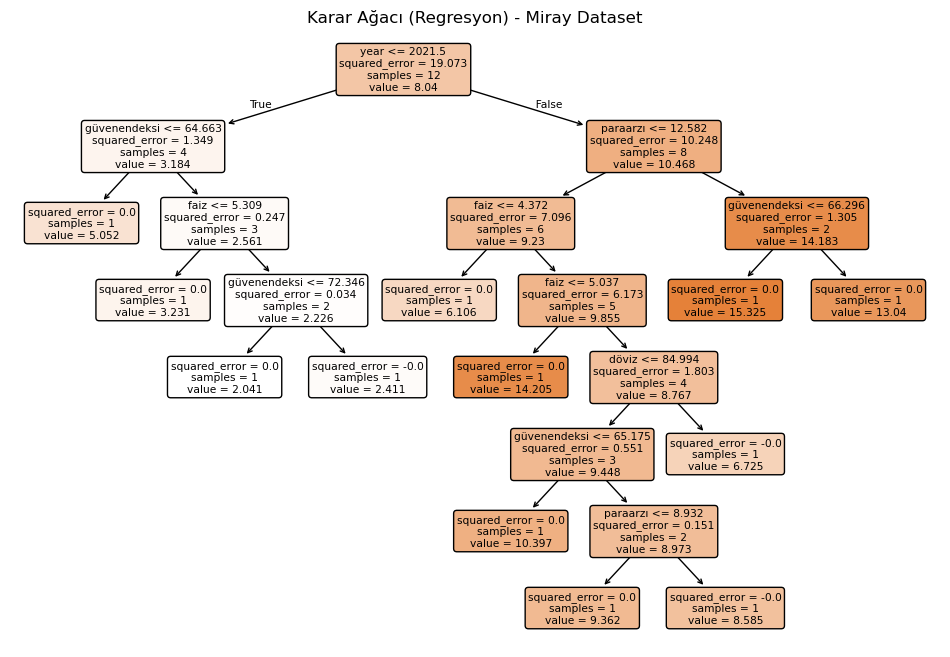

In [29]:
# 5. Karar ağacını görselleştirme
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, rounded=True)
plt.title("Karar Ağacı (Regresyon) - Miray Dataset")
plt.show()

In [31]:
# 6. Modelin hiperparametrelerini sınırlama
clf = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,  # Karar ağacının maksimum derinliği 5 ile sınırlandırılıyor.
#Bu, modelin aşırı karmaşık hale gelmesini ve aşırı öğrenmesini (overfitting) engeller.
    min_samples_split=4,  # Bir iç düğümün daha küçük alt düğümlere bölünebilmesi için en az 4 veri örneği olması gerekir.
#Bu sayede ağaç, çok küçük örneklerle bölünme yapmaz.
    min_samples_leaf=2,  # Her yaprakta en az 2 örnek olması şartı getirilmiştir.
#Bu da yine modelin genelleme yeteneğini artırır.
    max_features='sqrt'  # Her düğümde bölme yaparken kullanılacak maksimum özellik sayısını √(toplam özellik sayısı) olarak sınırlar.
#Bu, özellikle çok sayıda özelliğin olduğu durumlarda ağacın daha dengeli ve hızlı çalışmasını sağlar. 
)

In [33]:
#Bir karar ağacı, kökten (başlangıç düğümü) başlayarak veriyi dallara ayırır. 
#Bu ayrımların her bir seviyesi bir derinlik seviyesi olarak kabul edilir.
#Kök düğüm (root node) → Derinlik: 0
#İlk ayrım (ilk split) → Derinlik: 1
#İkinci ayrım → Derinlik: 2

# Modeli tekrar eğitelim
clf = clf.fit(X_train, y_train)


In [35]:
# 7. Test setiyle modelin doğruluğunu ölçme
y_pred = clf.predict(X_test)
# Modelin doğruluğunu ölçen metrikler
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Sonuçları yazdır
print(f"\nİlk Model - Mean Squared Error (MSE): {mse:.2f}")
print(f"İlk Model - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"İlk Model - Mean Absolute Error (MAE): {mae:.2f}")
print(f"İlk Model - R^2 Skoru: {r2:.2f}")
print(f"İlk Model - Explained Variance Score: {explained_variance:.2f}")



İlk Model - Mean Squared Error (MSE): 1.44
İlk Model - Root Mean Squared Error (RMSE): 1.20
İlk Model - Mean Absolute Error (MAE): 0.93
İlk Model - R^2 Skoru: 0.94
İlk Model - Explained Variance Score: 0.94


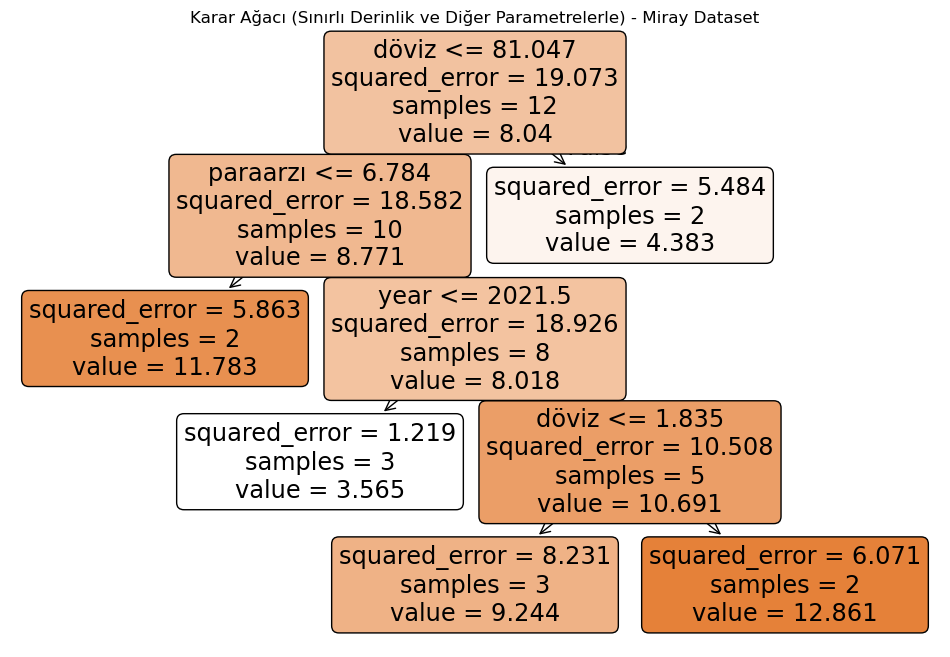

In [37]:
# 8. Karar ağacını görselleştirme (Sınırlı Derinlik ve Diğer Parametrelerle)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, rounded=True)
plt.title("Karar Ağacı (Sınırlı Derinlik ve Diğer Parametrelerle) - Miray Dataset")
plt.show()


In [39]:
# 9. Her düğümdeki varyans (impurity) değerlerini yazdır
print(f"\nModelde kullanılan kriter: {clf.criterion}")
#Yani her bir bölünmede, ortalama karesel hata (Mean Squared Error - MSE) en aza indirilmeye çalışılıyor.
#Ağaç, her bir düğümde veriyi ikiye ayırırken hangi bölmenin toplam hatayı (mse'yi) en çok azaltacağını hesaplıyor.
print("\nHer düğümdeki impurity (Varyans):")
print(clf.tree_.impurity)



Modelde kullanılan kriter: squared_error

Her düğümdeki impurity (Varyans):
[19.07307862 18.58166103  5.86328649 18.92638679  1.21868104 10.50824978
  8.23139028  6.07147205  5.48433422]


In [ ]:
#Daha düşük bir varyans, verilerin daha homojen olduğunu ve modelin bu düğümde daha iyi bir tahmin yapabileceğini gösterir. 
#Daha yüksek bir varyans, düğümde daha fazla belirsizlik olduğunu ve modelin bu düğümde daha fazla hata yapma potansiyeline sahip olduğunu gösterir.
#Düşük Varyans Değerleri: Örneğin, -3.63797881e-12 veya 0.00000000e+00 gibi sıfır ya da sıfıra yakın değerler, bu düğümlerin neredeyse homojen olduğunu ve modelin bu noktada güçlü bir tahmin yaptığını gösterir. 
#Bu, bölme işleminin iyi sonuç verdiğini ve o bölgedeki verilerin çok fazla çeşitliliğe sahip olmadığını gösterir.
#Yüksek Varyans Değerleri: Örneğin, 1.93210000e+02 gibi yüksek varyanslar, bu düğümlerin daha heterojen (farklı) veriler içerdiğini ve modelin burada daha fazla hata yapma potansiyeline sahip olduğunu gösterir. 
#Düğüm Derinliği: Varyans değerlerinin genellikle azalma eğiliminde olduğunu görüyorsanız, bu, ağacın her seviyesinde daha homojen veriler elde edildiğini ve ağacın doğru bir şekilde dallandığını gösterebilir. 
#Ancak, bazı düğümlerde hala yüksek varyanslar görüyorsanız, modelin aşırı uydurma yapıyor olabileceğini veya daha fazla veri noktasıyla daha iyi genel bir model oluşturulması gerektiğini düşünebilirsiniz.

In [41]:
# 10. Her düğümde hangi özellik kullanılmış onu yazdır
print("\nHer düğümdeki özellik indeksleri (split feature):")
print(clf.tree_.feature)


Her düğümdeki özellik indeksleri (split feature):
[ 3  1 -2  0 -2  3 -2 -2 -2]



Her düğümdeki Bilgi Kazancı:
Düğüm 0: Bilgi Kazancı = 2.6743
Düğüm 1: Bilgi Kazancı = 2.2679
Düğüm 3: Bilgi Kazancı = 11.9017
Düğüm 5: Bilgi Kazancı = 3.1408


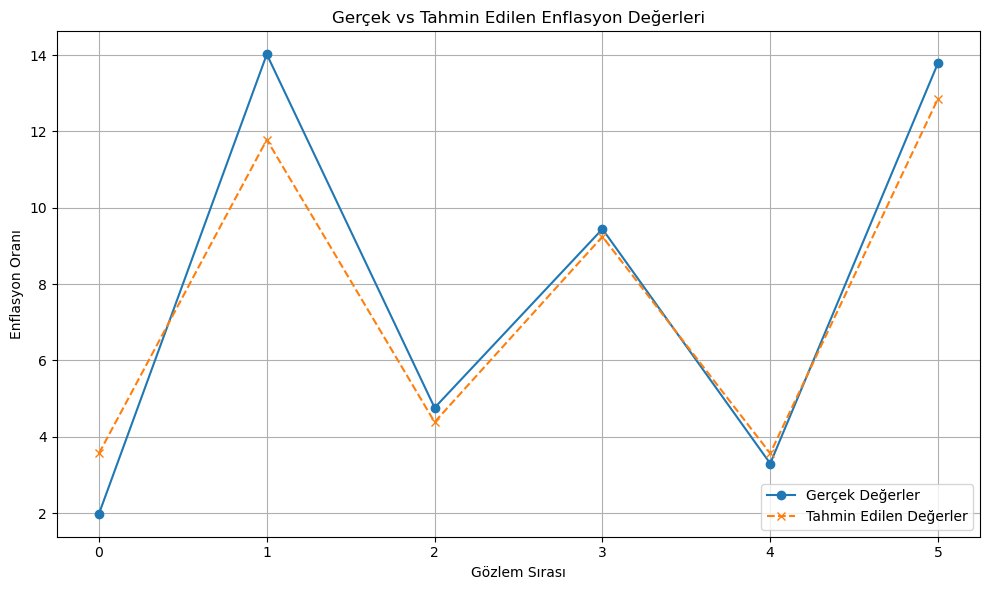

In [43]:
# 11. Her düğümdeki bilgi kazancı hesaplaması
print("\nHer düğümdeki Bilgi Kazancı:")
for node in range(clf.tree_.node_count):
    if clf.tree_.children_left[node] != clf.tree_.children_right[node]:
        impurity_before = clf.tree_.impurity[node]
        impurity_left = clf.tree_.impurity[clf.tree_.children_left[node]]                          
        impurity_right = clf.tree_.impurity[clf.tree_.children_right[node]]

        n_samples_left = clf.tree_.n_node_samples[clf.tree_.children_left[node]]
        n_samples_right = clf.tree_.n_node_samples[clf.tree_.children_right[node]]

        weighted_impurity = (n_samples_left / (n_samples_left + n_samples_right)) * impurity_left + \
                            (n_samples_right / (n_samples_left + n_samples_right)) * impurity_right
        information_gain = impurity_before - weighted_impurity

        print(f"Düğüm {node}: Bilgi Kazancı = {information_gain:.4f}")
        
        # Gerçek ve Tahmin Edilen Değerlerin Çizgi Grafiği
import matplotlib.pyplot as plt
import numpy as np

# y_test: Gerçek değerler
# y_pred: Modelin tahmin ettiği değerler

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Gerçek Değerler', linestyle='-', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Tahmin Edilen Değerler', linestyle='--', marker='x')
plt.title('Gerçek vs Tahmin Edilen Enflasyon Değerleri')
plt.xlabel('Gözlem Sırası')
plt.ylabel('Enflasyon Oranı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


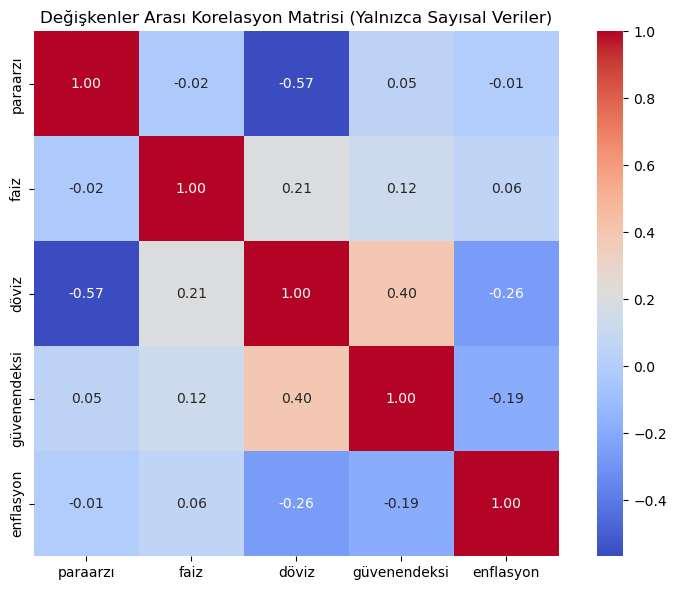

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excel dosyasını oku
df = pd.read_excel("/Users/miray/Desktop/miraydataset.xlsx")

# 'year' sütununu ve sayısal olmayan sütunları çıkar
df_corr = df.drop(columns=["year"])
df_corr = df_corr.select_dtypes(include=["number"])  # sadece sayısal veriler kalsın

# Korelasyon matrisini oluştur
corr_matrix = df_corr.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Değişkenler Arası Korelasyon Matrisi (Yalnızca Sayısal Veriler)")
plt.tight_layout()
plt.show()

        